In [1]:
#Handle imports
import pandas as pd
#visualising the data
import matplotlib.pyplot as plt
#numpy
import numpy as np


In [26]:
#loading data
train_data=pd.read_csv("./dataset/train.csv")

In [27]:
#getting basic info of data
print(train_data.info())
print(train_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [28]:
keys = train_data.columns.array
for val in keys:
    print("\nDescribing {} \n{}\n".format(val,train_data[val].describe()))
    if(train_data[val].dtypes=="object"):
        print(train_data[val].unique())


Describing id 
count    58645.000000
mean     29322.000000
std      16929.497605
min          0.000000
25%      14661.000000
50%      29322.000000
75%      43983.000000
max      58644.000000
Name: id, dtype: float64


Describing person_age 
count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        123.000000
Name: person_age, dtype: float64


Describing person_income 
count    5.864500e+04
mean     6.404617e+04
std      3.793111e+04
min      4.200000e+03
25%      4.200000e+04
50%      5.800000e+04
75%      7.560000e+04
max      1.900000e+06
Name: person_income, dtype: float64


Describing person_home_ownership 
count     58645
unique        4
top        RENT
freq      30594
Name: person_home_ownership, dtype: object

['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Describing person_emp_length 
count    58645.000000
mean         4.701015
std          3.959784
min          0.000000
25%         

In [29]:
#separating numeric value and categorical value
num_data_col=train_data.select_dtypes(include=["float64","int64"]).columns
cat_data_col=train_data.select_dtypes(include=["object","category"]).columns

print(num_data_col)
print(cat_data_col)


Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')
Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


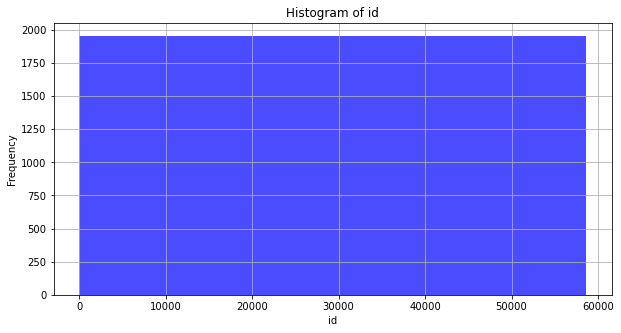

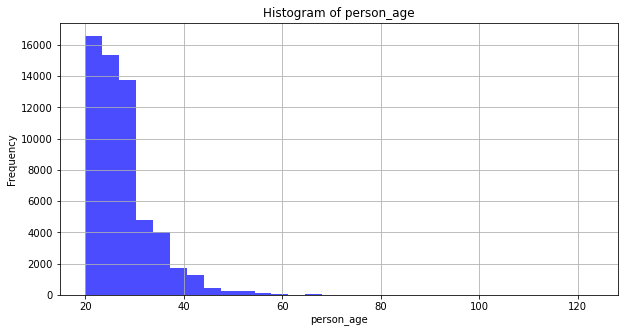

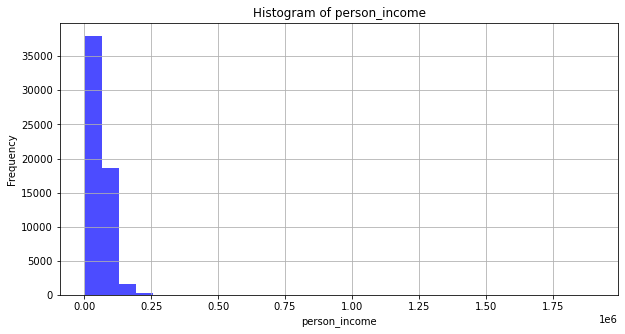

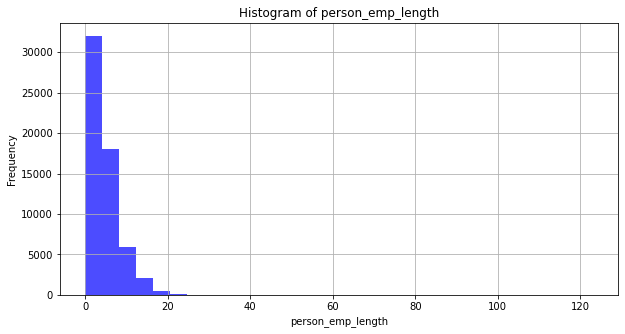

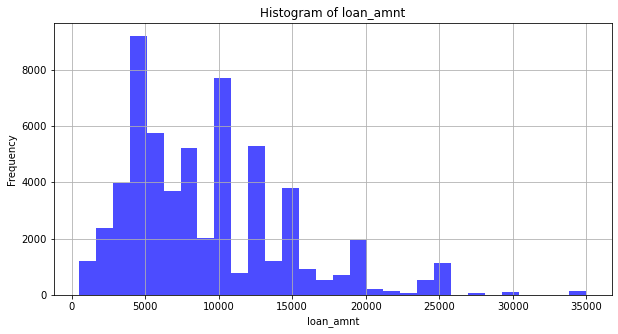

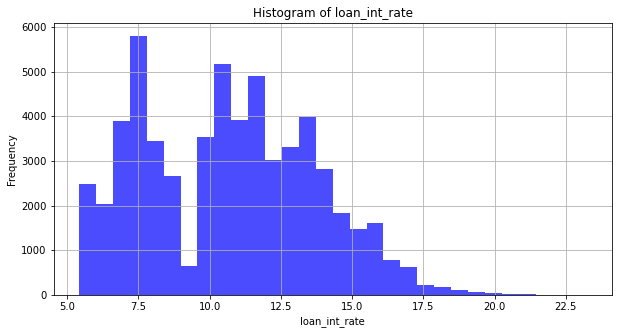

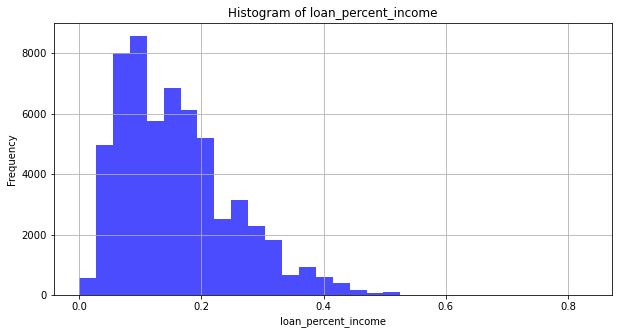

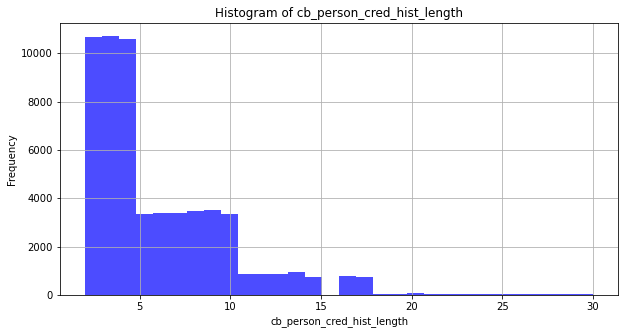

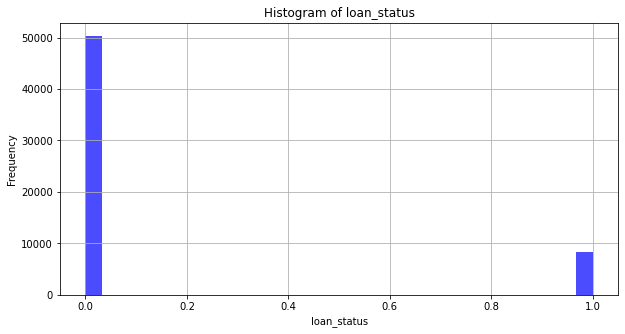

In [30]:
#plotting numeric data
# Plot histograms for numeric columns
for col in num_data_col:
    plt.figure(figsize=(10, 5))
    plt.hist(train_data[col].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

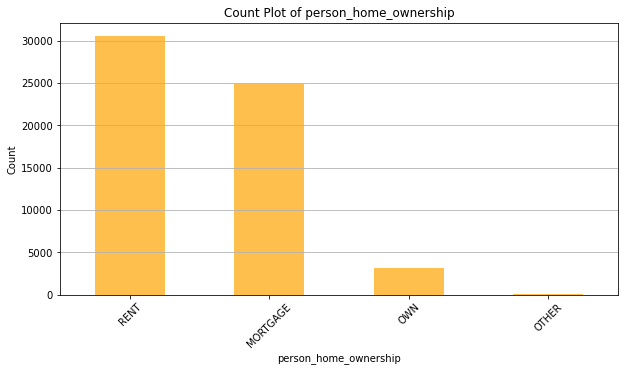

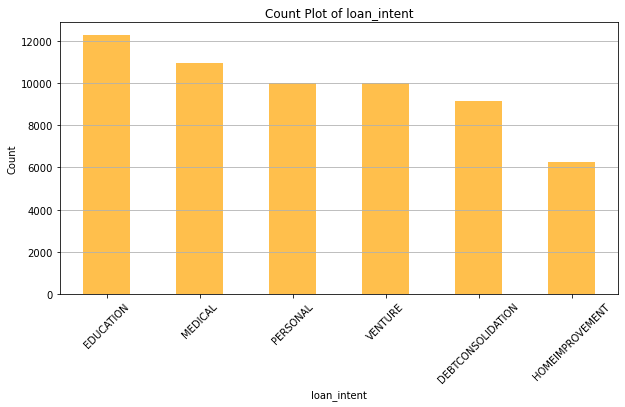

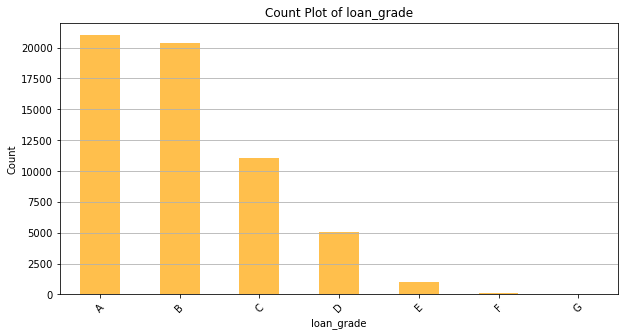

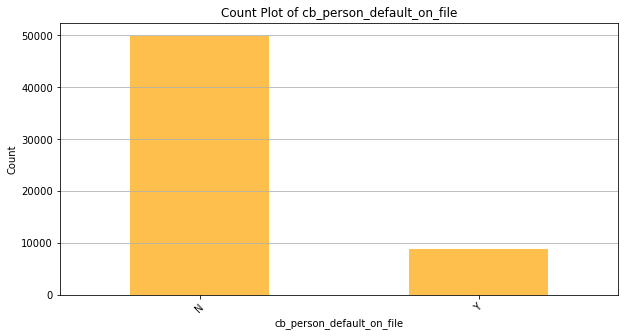

In [31]:
# Plot count plots for categorical columns
for col in cat_data_col:
    plt.figure(figsize=(10, 5))
    train_data[col].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

In [32]:
print(train_data.skew())


id                             0.000000
person_age                     1.965497
person_income                 10.457723
person_emp_length              2.054430
loan_amnt                      1.188578
loan_int_rate                  0.200020
loan_percent_income            0.917473
cb_person_cred_hist_length     1.618503
loan_status                    2.046848
dtype: float64


C:\Users\swapn\AppData\Local\Temp/ipykernel_21040/2663271933.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train_data.skew())


In [33]:
#applying log transformation for skew correction on numerical data
drop_columns=["id","loan_int_rate","loan_percent_income","loan_status","person_emp_length","loan_amnt"]
for col in drop_columns:
    num_data_col=num_data_col.drop(col)

print(num_data_col)
for col in num_data_col:
    train_data[col]=np.log(train_data[col])
print("\nPrinting the new skew matrix \n{}\n".format(train_data.skew()))

Index(['person_age', 'person_income', 'cb_person_cred_hist_length'], dtype='object')

Printing the new skew matrix 
id                            0.000000
person_age                    1.180277
person_income                 0.221811
person_emp_length             2.054430
loan_amnt                     1.188578
loan_int_rate                 0.200020
loan_percent_income           0.917473
cb_person_cred_hist_length    0.314017
loan_status                   2.046848
dtype: float64



C:\Users\swapn\AppData\Local\Temp/ipykernel_21040/3673384142.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\nPrinting the new skew matrix \n{}\n".format(train_data.skew()))


In [34]:
print(train_data.skew())

id                            0.000000
person_age                    1.180277
person_income                 0.221811
person_emp_length             2.054430
loan_amnt                     1.188578
loan_int_rate                 0.200020
loan_percent_income           0.917473
cb_person_cred_hist_length    0.314017
loan_status                   2.046848
dtype: float64


C:\Users\swapn\AppData\Local\Temp/ipykernel_21040/3262129964.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train_data.skew())


In [ ]:
num_data_col=train_data.select_dtypes(include=["float64","int64"]).columns

for col in num_data_col:
    plt.figure(figsize=(10, 5))
    plt.hist(train_data[col].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [35]:
train_data_encoded=pd.get_dummies(train_data,columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

In [36]:
features=train_data_encoded.drop(columns=["loan_status"])
target=train_data_encoded["loan_status"]

print(features.info())
print(target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           58645 non-null  int64  
 1   person_age                   58645 non-null  float64
 2   person_income                58645 non-null  float64
 3   person_emp_length            58645 non-null  float64
 4   loan_amnt                    58645 non-null  int64  
 5   loan_int_rate                58645 non-null  float64
 6   loan_percent_income          58645 non-null  float64
 7   cb_person_cred_hist_length   58645 non-null  float64
 8   person_home_ownership_OTHER  58645 non-null  uint8  
 9   person_home_ownership_OWN    58645 non-null  uint8  
 10  person_home_ownership_RENT   58645 non-null  uint8  
 11  loan_intent_EDUCATION        58645 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  58645 non-null  uint8  
 13  loan_intent_MEDI

In [37]:
from sklearn.model_selection import train_test_split
#test train split
train_feature,test_feature,train_target,test_target=train_test_split(
    features,target,test_size=0.2,random_state=42
)

print("Train Features shape:", train_feature.shape)
print("Test Features shape:", test_feature.shape)
print("Train Target shape:", train_target.shape)
print("Test Target shape:", test_target.shape)

Train Features shape: (46916, 23)
Test Features shape: (11729, 23)
Train Target shape: (46916,)
Test Target shape: (11729,)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [39]:
logistic_model_transformed = LogisticRegression(max_iter=1000,class_weight='balanced')  # Increase max_iter if needed
logistic_model_transformed.fit(train_feature, train_target)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [40]:
test_predicted=logistic_model_transformed.predict(test_feature)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_target,test_predicted))
print(classification_report(test_target,test_predicted))

[[7972 2115]
 [ 317 1325]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     10087
           1       0.39      0.81      0.52      1642

    accuracy                           0.79     11729
   macro avg       0.67      0.80      0.69     11729
weighted avg       0.88      0.79      0.82     11729



In [42]:
#loading test data
test_data=pd.read_csv("./dataset/test.csv")


In [43]:
test_data_encoded=pd.get_dummies(test_data,columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB
None


In [44]:
train_feature_columns=['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y']

test_data_encoded = test_data_encoded.reindex(columns=train_feature_columns, fill_value=0)
print(test_data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39098 non-null  int64  
 1   person_age                   39098 non-null  int64  
 2   person_income                39098 non-null  int64  
 3   person_emp_length            39098 non-null  float64
 4   loan_amnt                    39098 non-null  int64  
 5   loan_int_rate                39098 non-null  float64
 6   loan_percent_income          39098 non-null  float64
 7   cb_person_cred_hist_length   39098 non-null  int64  
 8   person_home_ownership_OTHER  39098 non-null  uint8  
 9   person_home_ownership_OWN    39098 non-null  uint8  
 10  person_home_ownership_RENT   39098 non-null  uint8  
 11  loan_intent_EDUCATION        39098 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  39098 non-null  uint8  
 13  loan_intent_MEDI

In [45]:
for col in num_data_col:
    test_data_encoded[col]=np.log(test_data_encoded[col])
print("\nPrinting the new skew matrix \n{}\n".format(test_data_encoded.skew()))


Printing the new skew matrix 
id                              0.000000
person_age                      1.189266
person_income                   0.211530
person_emp_length               1.163814
loan_amnt                       1.204413
loan_int_rate                   0.185347
loan_percent_income             0.939094
cb_person_cred_hist_length      0.320093
person_home_ownership_OTHER    22.179972
person_home_ownership_OWN       4.009149
person_home_ownership_RENT     -0.074842
loan_intent_EDUCATION           1.449742
loan_intent_HOMEIMPROVEMENT     2.530135
loan_intent_MEDICAL             1.576592
loan_intent_PERSONAL            1.717084
loan_intent_VENTURE             1.760644
loan_grade_B                    0.638478
loan_grade_C                    1.573849
loan_grade_D                    3.008682
loan_grade_E                    7.641949
loan_grade_F                   19.219598
loan_grade_G                   46.575509
cb_person_default_on_file_Y     1.958699
dtype: float64



In [46]:
predictions=logistic_model_transformed.predict(test_data_encoded)

In [47]:
results = pd.DataFrame({
    'id': test_data_encoded['id'],  # Assuming your test data has an 'id' column
    'loan_status': predictions
})

results.to_csv('predicted_loans_data_engineering.csv', index=False)

print("Predictions saved to predicted_loans.csv")


Predictions saved to predicted_loans.csv
